### PySpark
PySpark is a Python API for Apache Spark. Apache Spark is an analytical processing engine for large scale powerful distributed data processing and machine learning applications.

PySpark is a Spark library written in Python to run Python applications using Apache Spark capabilities, using PySpark we can run applications parallelly on the distributed cluster (multiple nodes).

Spark basically written in Scala and later on due to its industry adaptation it’s API PySpark released for Python using Py4J. Py4J is a Java library that is integrated within PySpark and allows python to dynamically interface with JVM objects, hence to run PySpark you also need Java to be installed along with Python, and Apache Spark.

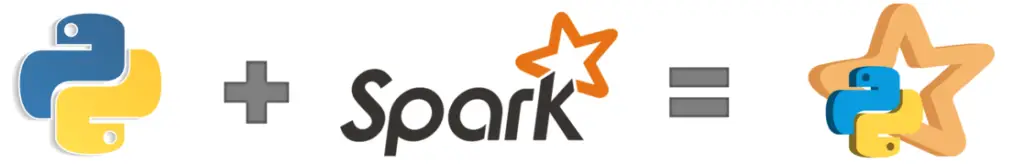

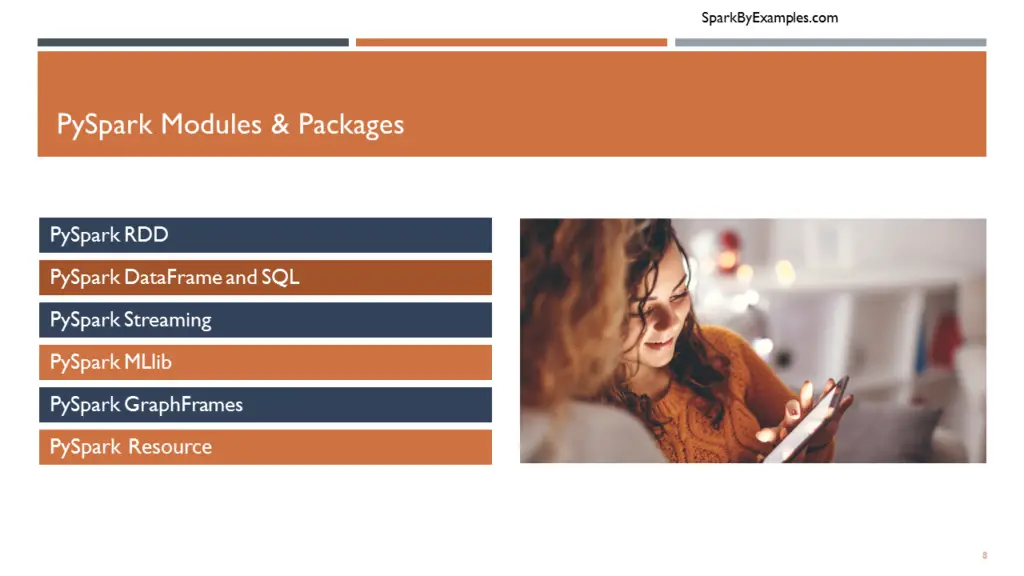

#### PySpark Architecture
Apache Spark works in a master-slave architecture where the master is called “Driver” and slaves are called “Workers”. When you run a Spark application, Spark Driver creates a context that is an entry point to your application, and all operations (transformations and actions) are executed on worker nodes, and the resources are managed by Cluster Manager.

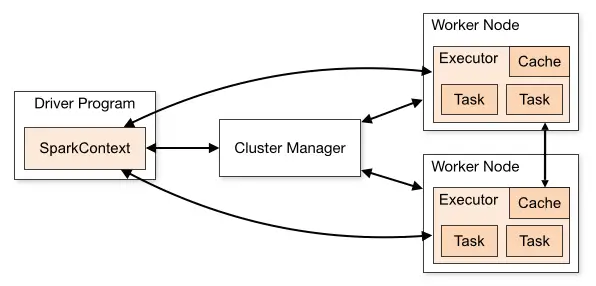

# Spark DataFrame Basics

Spark DataFrames are the workhouse and main way of working with Spark and Python post Spark 2.0. DataFrames act as powerful versions of tables, with rows and columns, easily handling large datasets. The shift to DataFrames provides many advantages:
* A much simpler syntax
* Ability to use SQL directly in the dataframe
* Operations are automatically distributed across RDDs
    
If you've used R or even the pandas library with Python you are probably already familiar with the concept of DataFrames. Spark DataFrame expand on a lot of these concepts, allowing you to transfer that knowledge easily by understanding the simple syntax of Spark DataFrames. Remember that the main advantage to using Spark DataFrames vs those other programs is that Spark can handle data across many RDDs, huge data sets that would never fit on a single computer. That comes at a slight cost of some "peculiar" syntax choices, but after this course you will feel very comfortable with all those topics!

Let's get started!

## Creating a DataFrame

First we need to start a SparkSession:

In [ ]:
!pip install pyspark
!pip install findspark

In [1]:
import findspark
findspark.init()
findspark.find()

'C:\\Users\\Ravinder.Ahuja\\AppData\\Roaming\\Python\\Python39\\site-packages\\pyspark'

In [2]:
from pyspark.sql import SparkSession

Then start the SparkSession

In [3]:
# May take a little while on a local computer
spark = SparkSession.builder.appName("Basics").getOrCreate()


You will first need to get the data from a file (or connect to a large distributed file like HDFS, we'll talk about this later once we move to larger datasets on AWS EC2).

In [4]:
# We'll discuss how to read other options later.
# This dataset is from Spark's examples

# Might be a little slow locally
df = spark.read.json('people.json')

In [5]:
type(df)

pyspark.sql.dataframe.DataFrame

#### Showing the data

In [6]:
# Note how data is missing!
df.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [7]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [8]:
df.columns

['age', 'name']

In [9]:
df.describe().show()

+-------+------------------+-------+
|summary|               age|   name|
+-------+------------------+-------+
|  count|                 2|      3|
|   mean|              24.5|   null|
| stddev|7.7781745930520225|   null|
|    min|                19|   Andy|
|    max|                30|Michael|
+-------+------------------+-------+



Some data types make it easier to infer schema (like tabular formats such as csv which we will show later). 

However you often have to set the schema yourself if you aren't dealing with a .read method that doesn't have inferSchema() built-in.

Spark has all the tools you need for this, it just requires a very specific structure:

In [10]:
from pyspark.sql.types import StructField,StringType,IntegerType,StructType

Next we need to create the list of Structure fields
    * :param name: string, name of the field.
    * :param dataType: :class:`DataType` of the field.
    * :param nullable: boolean, whether the field can be null (None) or not.

In [11]:
data_schema = [StructField("age", IntegerType(), True),StructField("name", StringType(), True)]

In [12]:
final_struc = StructType(fields=data_schema)

In [13]:
df = spark.read.json('people.json', schema=final_struc)

In [14]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- name: string (nullable = true)



### Grabbing the data

In [15]:
df['age']

Column<'age'>

In [16]:
type(df['age'])

pyspark.sql.column.Column

In [17]:
df.select('age')

DataFrame[age: int]

In [19]:
type(df.select('age'))

pyspark.sql.dataframe.DataFrame

In [18]:
df.select('age').show()

+----+
| age|
+----+
|null|
|  30|
|  19|
+----+



In [20]:
# Returns list of Row objects
df.head(2)

[Row(age=None, name='Michael'), Row(age=30, name='Andy')]

Multiple Columns:

In [21]:
df.select(['age','name'])

DataFrame[age: int, name: string]

In [22]:
df.select(['age','name']).show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



### Creating new columns

In [27]:
# Adding a new column with a simple copy
df1=df.withColumn('newage',df['age']).show()

+----+-------+------+
| age|   name|newage|
+----+-------+------+
|null|Michael|  null|
|  30|   Andy|    30|
|  19| Justin|    19|
+----+-------+------+



In [28]:
df.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [26]:
df1.show()

AttributeError: 'NoneType' object has no attribute 'show'

In [29]:
# Simple Rename
df.withColumnRenamed('age','supernewage').show()

+-----------+-------+
|supernewage|   name|
+-----------+-------+
|       null|Michael|
|         30|   Andy|
|         19| Justin|
+-----------+-------+



More complicated operations to create new columns

In [30]:
df.withColumn('doubleage',df['age']*2).show()

+----+-------+---------+
| age|   name|doubleage|
+----+-------+---------+
|null|Michael|     null|
|  30|   Andy|       60|
|  19| Justin|       38|
+----+-------+---------+



In [31]:
df.withColumn('add_one_age',df['age']+1).show()

+----+-------+-----------+
| age|   name|add_one_age|
+----+-------+-----------+
|null|Michael|       null|
|  30|   Andy|         31|
|  19| Justin|         20|
+----+-------+-----------+



In [32]:
df.withColumn('half_age',df['age']/2).show()

+----+-------+--------+
| age|   name|half_age|
+----+-------+--------+
|null|Michael|    null|
|  30|   Andy|    15.0|
|  19| Justin|     9.5|
+----+-------+--------+



In [33]:
df.withColumn('half_age',df['age']/2)

DataFrame[age: int, name: string, half_age: double]

We'll discuss much more complicated operations later on!

### Using SQL

To use SQL queries directly with the dataframe, you will need to register it to a temporary view:

In [34]:
# Register the DataFrame as a SQL temporary view
df.createOrReplaceTempView("people")

In [35]:
sql_results = spark.sql("SELECT * FROM people")

In [36]:
sql_results

DataFrame[age: int, name: string]

In [37]:
sql_results.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [38]:
spark.sql("SELECT * FROM people WHERE age=30").show()

+---+----+
|age|name|
+---+----+
| 30|Andy|
+---+----+



We won't really be focusing on using the SQL syntax for this course in general, but keep in mind it is always there for you to get you out of bind quickly with your SQL skills!

Alright that is all we need to know for now!

In [39]:
emp = [(1,"Smith",-1,"2018","10","M",3000), \
    (2,"Rose",1,"2010","20","M",4000), \
    (3,"Williams",1,"2010","10","M",1000), \
    (4,"Jones",2,"2005","10","F",2000), \
    (5,"Brown",2,"2010","40","",-1), \
      (6,"Brown",2,"2010","50","",-1) \
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined", \
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)

dept = [("Finance",10), \
    ("Marketing",20), \
    ("Sales",30), \
    ("IT",40) \
  ]
deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)

root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

In [40]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner").show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



In [41]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"outer") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"full") \
    .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"fullouter") \
    .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+-

In [42]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"left").show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"leftouter").show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
|6     |Brown   |2              |2010       |50         |      |-1    |null     |null   |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|n

In [43]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"right") \
   .show(truncate=False)
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"rightouter") \
   .show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|null  |null    |null           |null       |null       |null  |null  |Sales    |30     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|n

#### PySpark – Loop/Iterate Through Rows in DataFrame


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

data = [('James','Smith','M',30),('Anna','Rose','F',41),
  ('Robert','Williams','M',62), 
]
columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()

In [ ]:
# Foreach example
def f(x): print(x)
df.foreach(f)

In [ ]:
# Another example
df.foreach(lambda x: 
    print("Data ==>"+x["firstname"]+","+x["lastname"]+","+x["gender"]+","+str(x["salary"]*2))) 

In [ ]:
# Using pandas
import pandas as pd
#spark.conf.set("spark.sql.execution.arrow.enabled", "true")
pandasDF = df.toPandas()
for index, row in pandasDF.iterrows():
    print(row['firstname'], row['gender'])

In [ ]:
# Collect the data to Python List
dataCollect = df.collect()
for row in dataCollect:
    print(row['firstname'] + "," +row['lastname'])

In [ ]:
# By Calling function
def func1(x):
    firstName=x.firstname
    lastName=x.lastName
    name=firstName+","+lastName
    gender=x.gender.lower()
    salary=x.salary*2
    return (name,gender,salary)

rdd2=df.rdd.map(lambda x: func1(x))

In [ ]:
rdd2

In [44]:
# importing necessary libraries
import pyspark
from pyspark.sql import SparkSession

# function to create new SparkSession
def create_session():
	spk = SparkSession.builder \
		.master("local") \
		.appName("employee_profile.com") \
		.getOrCreate()
	return spk


def create_df(spark, data, schema):
	df1 = spark.createDataFrame(data, schema)
	return df1


if __name__ == "__main__":

	# calling function to create SparkSession
	spark = create_session()

	input_data = [(1, "Shivansh", "Data Scientist", "Noida"),
				(2, "Rishabh", "Software Developer", "Bangalore"),
				(3, "Swati", "Data Analyst", "Hyderabad"),
				(4, "Amar", "Data Analyst", "Noida"),
				(5, "Arpit", "Android Developer", "Pune"),
				(6, "Ranjeet", "Python Developer", "Gurugram"),
				(7, "Priyanka", "Full Stack Developer", "Bangalore")]

	schema = ["Id", "Name", "Job Profile", "City"]

	# calling function to create dataframe
	df = create_df(spark, input_data, schema)

	# retrieving all the elements of
	# the dataframe using collect()
	# Storing in the variable
	data_collect = df.collect()

	df.show()


+---+--------+--------------------+---------+
| Id|    Name|         Job Profile|     City|
+---+--------+--------------------+---------+
|  1|Shivansh|      Data Scientist|    Noida|
|  2| Rishabh|  Software Developer|Bangalore|
|  3|   Swati|        Data Analyst|Hyderabad|
|  4|    Amar|        Data Analyst|    Noida|
|  5|   Arpit|   Android Developer|     Pune|
|  6| Ranjeet|    Python Developer| Gurugram|
|  7|Priyanka|Full Stack Developer|Bangalore|
+---+--------+--------------------+---------+



#### Method 1: Using collect()


In [45]:
# retrieving all the elements
# of the dataframe using collect()
# Storing in the variable
data_collect = df.collect()

# looping thorough each row of the dataframe
for row in data_collect:
	# while looping through each
	# row printing the data of Id, Name and City
	print(row["Id"],row["Name"]," ",row["City"])


1 Shivansh   Noida
2 Rishabh   Bangalore
3 Swati   Hyderabad
4 Amar   Noida
5 Arpit   Pune
6 Ranjeet   Gurugram
7 Priyanka   Bangalore


#### Method 2: Using toLocalIterator()


In [46]:
data_itr = df.rdd.toLocalIterator()

# looping thorough each row of the dataframe
for row in data_itr:

	# while looping through each row printing
	# the data of Id, Job Profile and City
	print(row["Id"]," ",row["Job Profile"]," ",row["City"])


1   Data Scientist   Noida
2   Software Developer   Bangalore
3   Data Analyst   Hyderabad
4   Data Analyst   Noida
5   Android Developer   Pune
6   Python Developer   Gurugram
7   Full Stack Developer   Bangalore


#### Method 3: Using iterrows()


In [47]:
pd_df = df.toPandas()

# looping through each row using iterrows()
# used to iterate over dataframe rows as index,
# series pair
for index, row in pd_df.iterrows():

	# while looping through each row
	# printing the Id, Name and Salary
	# by passing index instead of Name
	# of the column
	print(row[0],row[1]," ",row[3])
    


1 Shivansh   Noida
2 Rishabh   Bangalore
3 Swati   Hyderabad
4 Amar   Noida
5 Arpit   Pune
6 Ranjeet   Gurugram
7 Priyanka   Bangalore


#### Method 4: Using map()


In [48]:
# importing necessary libraries
import pyspark
from pyspark.sql import SparkSession

# function to create new SparkSession
def create_session():
    spk = SparkSession.builder.master("local").appName("employee_profile.com").getOrCreate()
    return spk

def create_df(spark,data,schema):
    df1 = spark.createDataFrame(data,schema)
    return df1


# calling function to create SparkSession
spark = create_session()
	
input_data = [(1,"Shivansh","Data Scientist",2000000,"Noida"),
		(2,"Rishabh","Software Developer",1500000,"Bangalore"),
		(3,"Swati","Data Analyst",1000000,"Hyderabad"),
		(4,"Amar","Data Analyst",950000,"Noida"),
		(5,"Arpit","Android Developer",1600000,"Pune"),
		(6,"Ranjeet","Python Developer",1800000,"Gurugram"),
		(7,"Priyanka","Full Stack Developer",2200000,"Bangalore")]

schema = ["Id","Name","Job Profile","Salary","City"]

# calling function to create dataframe
df = create_df(spark,input_data,schema)

# map() is only be performed on rdd
# so converting the dataframe into rdd using df.rdd
rdd = df.rdd.map(lambda loop: (
	loop["Id"],loop["Name"],loop["Salary"],loop["City"])
)

# after looping the getting the data from each row
# converting back from RDD to Dataframe
df2 = rdd.toDF(["Id","Name","Salary","City"])

# showing the new Dataframe
df2.show()


+---+--------+-------+---------+
| Id|    Name| Salary|     City|
+---+--------+-------+---------+
|  1|Shivansh|2000000|    Noida|
|  2| Rishabh|1500000|Bangalore|
|  3|   Swati|1000000|Hyderabad|
|  4|    Amar| 950000|    Noida|
|  5|   Arpit|1600000|     Pune|
|  6| Ranjeet|1800000| Gurugram|
|  7|Priyanka|2200000|Bangalore|
+---+--------+-------+---------+



#### Method 5: Using list comprehension

In [ ]:
# using list comprehension for looping
# through each row storing the list of
# data in the variable
table = [x["Job Profile"] for x in df.rdd.collect()]

# looping the list for printing
for row in table:
	print(row)


#### Method 6: Using select()


In [49]:
# importing necessary libraries
import pyspark
from pyspark.sql import SparkSession

# function to create new SparkSession
def create_session():
	spk = SparkSession.builder \
		.master("local") \
		.appName("employee_profile.com") \
		.getOrCreate()
	return spk


def create_df(spark, data, schema):
	df1 = spark.createDataFrame(data, schema)
	return df1


if __name__ == "__main__":

	# calling function to create SparkSession
	spark = create_session()

	input_data = [(1, "Shivansh", "Data Scientist", 2000000, "Noida"),
				(2, "Rishabh", "Software Developer", 1500000, "Bangalore"),
				(3, "Swati", "Data Analyst", 1000000, "Hyderabad"),
				(4, "Amar", "Data Analyst", 950000, "Noida"),
				(5, "Arpit", "Android Developer", 1600000, "Pune"),
				(6, "Ranjeet", "Python Developer", 1800000, "Gurugram"),
				(7, "Priyanka", "Full Stack Developer", 2200000, "Bangalore")]

	schema = ["Id", "Name", "Job Profile", "Salary", "City"]

	# calling function to create dataframe
	df = create_df(spark, input_data, schema)

	# getting each row of dataframe containing
	# only selected columns Selected columns are
	# 'Name' and 'Salary' getting the list of rows
	# with selected column data using collect()
	rows_looped = df.select("Name", "Salary").collect()

	# printing the data of each row
	for rows in rows_looped:
	
		# here index 0 and 1 refers to the data
		# of 'Name' column and 'Salary' column
		print(rows[0], rows[1])


Shivansh 2000000
Rishabh 1500000
Swati 1000000
Amar 950000
Arpit 1600000
Ranjeet 1800000
Priyanka 2200000


In [ ]:
from pyspark.sql import SparkSession

app_name = "PySpark foreach Example"
master = "local"

spark = SparkSession.builder \
    .appName(app_name) \
    .master(master) \
    .getOrCreate()

#spark.sparkContext.setLogLevel("WARN")

# Create a DataFrame
df = spark.createDataFrame(
    [['Hello', 'Kontext'], ['Hello', 'Big Data']], ['col1', 'col2'])

df.show()


def print_row(row):
    print(f'col1={row.col1}, col2={row.col2}')


# Apply print_row to each row
df.foreach(print_row)
